# Decision Tree Modeling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')
df

,Tournament,Club,Player,Number,Date,Market_value,Nation,Pos,Position,Age,...,Passes_through_balls,Passes_Switches,Passes_crosses,Passes_throw-Ins_taken,Corner_kicks,Corner_Kicks_In,Corner_Kicks_Out,Corner_Kicks_Straight,Passes_offside,Passes_blocked
0,Laliga,Ca Osasuna,Nano,23.0,2018-05-30,50000,es ESP,FW,Forward,25,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.0,0.100000,0.500000
1,Laliga,Rcd Mallorca,Alejandro Alfaro,32.0,2019-09-10,300000,es ESP,CM,Midfielder,20,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Bundesliga,Bayer 04 Leverkusen,Paulinho,15.0,2022-11-09,7000000,br BRA,LM,Midfielder,29,...,0.058824,0.058824,0.088235,0.088235,0.000000,0.000000,0.000000,0.0,0.147059,0.500000
3,Premier League,Fc Liverpool,Fabinho,3.0,2022-11-03,55000000,br BRA,CM,Midfielder,28,...,0.122699,0.288344,0.239264,0.147239,0.000000,0.000000,0.000000,0.0,0.098160,0.472393
4,Serie A,Chievo Verona,Mamadou Samassa,30.0,2020-02-11,100000,ml MLI,GK,Goal Keeper,27,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.238095,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Laliga,Real Sociedad San Sebastian,Robin Le Normand,24.0,2022-11-07,35000000,fr FRA,CB,Defender,25,...,0.008621,0.284483,0.025862,0.103448,0.000000,0.000000,0.000000,0.0,0.112069,0.224138
3481,Laliga,Real Sociedad San Sebastian,Ander Guevara,16.0,2022-11-07,5000000,es ESP,CB,Defender,25,...,0.059701,0.208955,0.074627,0.029851,0.000000,0.000000,0.000000,0.0,0.179104,0.567164
3482,Laliga,Fc Villarreal,Alfonso Pedraza,24.0,2022-11-07,18000000,es ESP,LB,Defender,26,...,0.025806,0.109677,2.909677,4.890323,0.006452,0.000000,0.006452,0.0,0.154839,1.716129
3483,Laliga,Real Sociedad San Sebastian,Jon Pacheco,20.0,2022-11-07,6000000,es ESP,CB,Defender,21,...,0.000000,0.285714,0.047619,0.238095,0.000000,0.000000,0.000000,0.0,0.190476,0.285714


# Separating Data by Position

In [7]:
forward = df[df['Position']=='Forward']
midfield = df[df['Position']=='Midfielder']
defence = df[df['Position']=='Defender']
gk = pd.read_csv('final_gk.csv')

# Decision Trees Regressor with all Features and Default Hyperparameters

In [8]:
X = forward.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = forward['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)


#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [10]:
#Initiating DecisionTreeRegressor to calculate feature importance
DtReg = DecisionTreeRegressor()

In [11]:
DtReg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [12]:
cross_val_train = cross_val_score(DtReg, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(DtReg, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [13]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

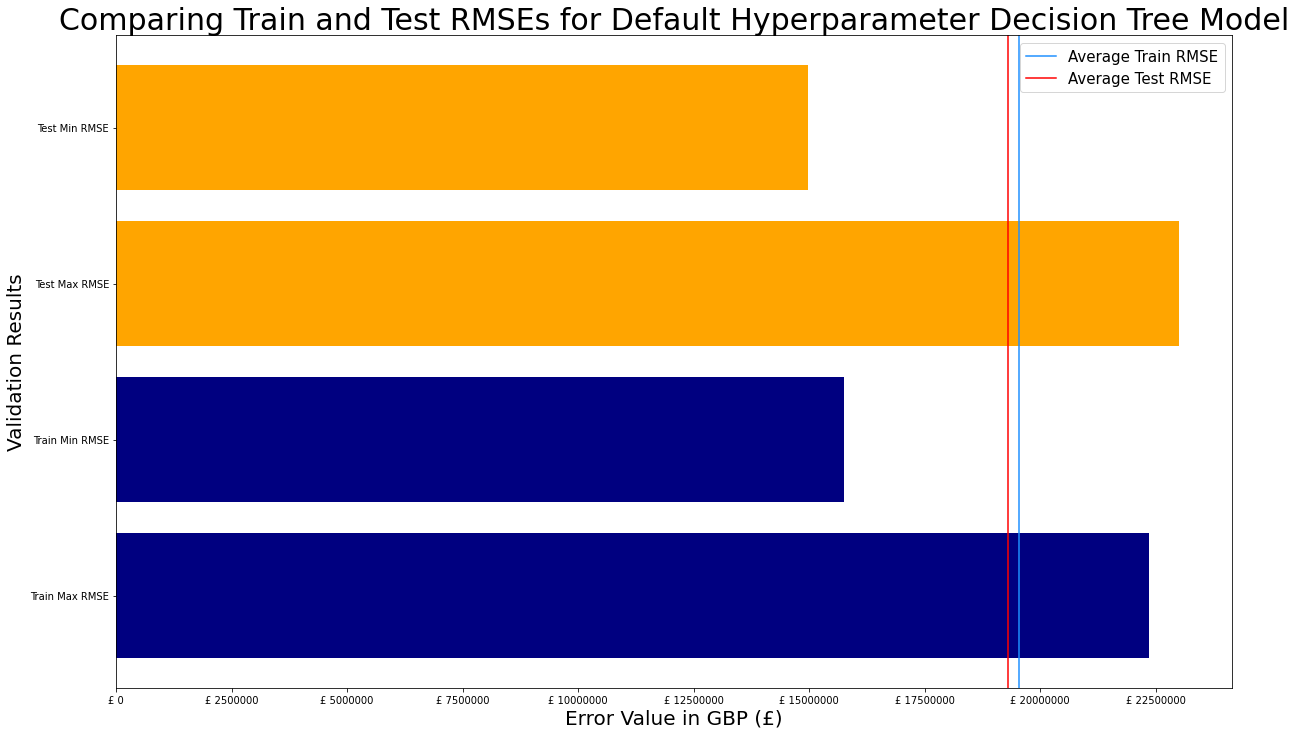

In [14]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Decision Tree Model',fontsize=30)
ax.legend(fontsize=15)

# Hyperparameter Tuning. (Finding  Hyperparameters that may improve our model performance)

Since a GridSearch would take a long time to run with all our features, we will perform a GridSearch for a model that would only take the top 10 most important features.

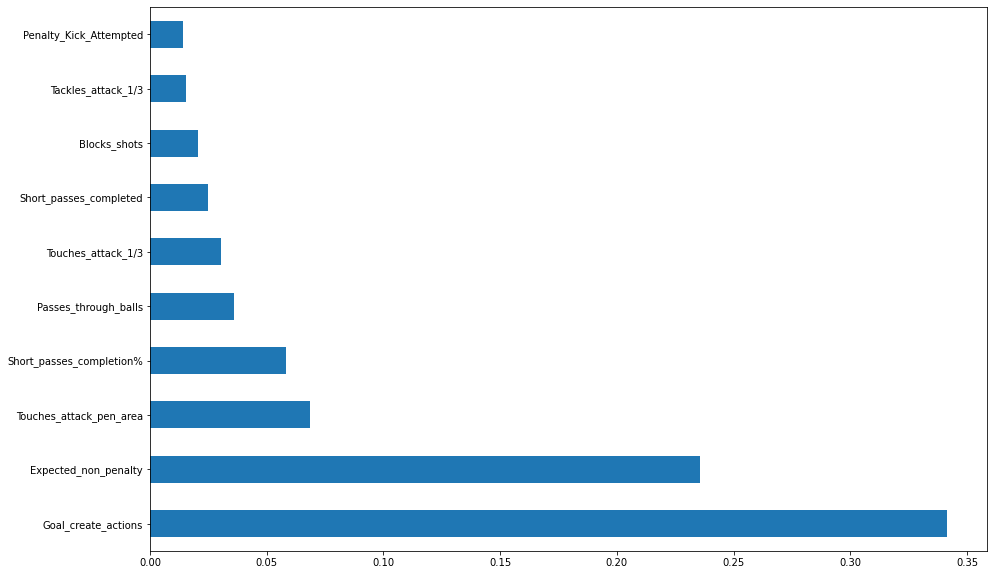

In [15]:
# print the features importance.

fig,ax = plt.subplots(figsize=(15,10))

feat_importances = pd.Series(DtReg.feature_importances_, index=X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')

plt.show()

In [16]:
#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

## Building a newer model. This time only with important features

In [17]:
X = forward.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = forward['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

## Grid Search

In [19]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(DtReg,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

#function for calculating how much time taken for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)

### Fitting data to find best parameters

In [20]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X_train_scaled,y_train)

timer(start_time)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-13019707.935 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-17409033.594 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-21379637.730 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-15302242.047 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-20914704.807 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fra

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf mus

In [21]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 11,
 'max_features': 'log2',
 'max_leaf_nodes': 70,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

# Using a Decision Tree Regressor with important features and better Parameters

In [22]:
param_values = list((tuning_model.best_params_).values())

In [23]:
# Traning model with all features using best Decision Tree Hyperparameters

DtReg_Grid = DecisionTreeRegressor(max_depth=param_values[0],
                                 max_features=param_values[1],
                                 max_leaf_nodes=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_weight_fraction_leaf=param_values[4],
                                 splitter=param_values[5])

DtReg_Grid.fit(X_train_scaled,y_train);

In [24]:
cross_val_train = cross_val_score(DtReg_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(DtReg_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

In [25]:
#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

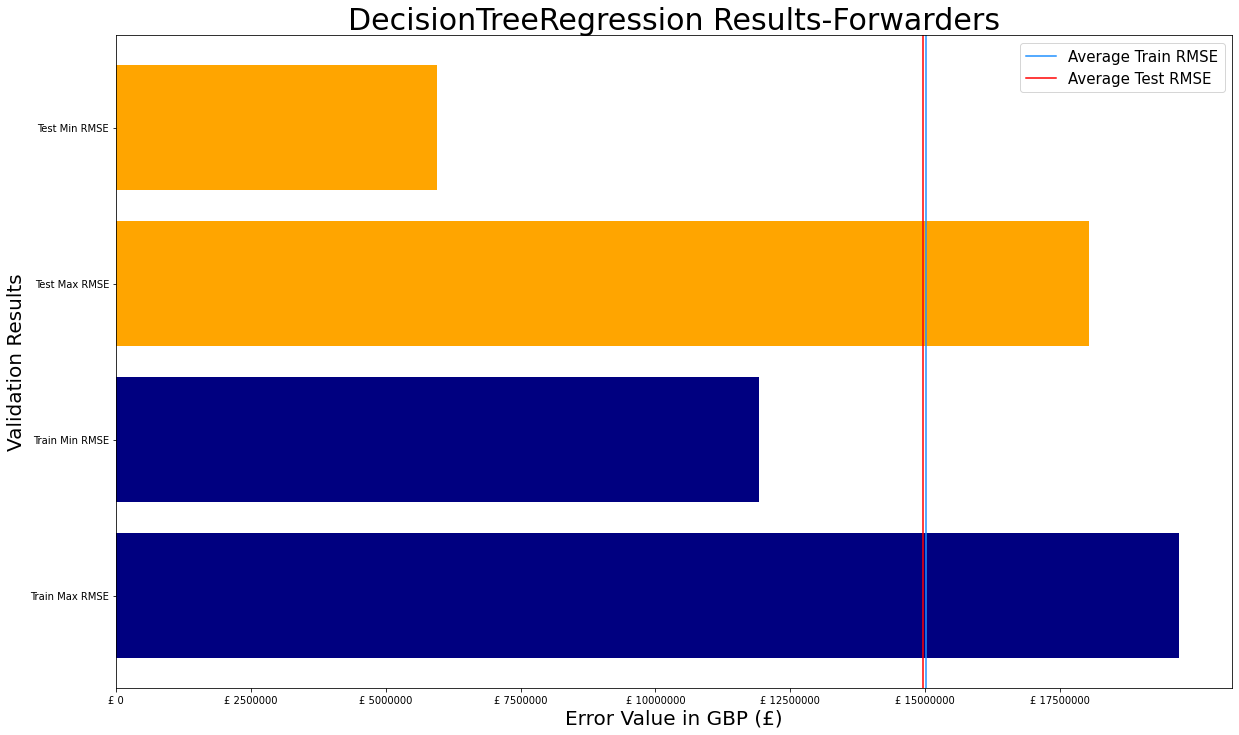

In [27]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([int(results_att.iloc[0][2]),(round(results_att.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_att.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_att.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_att.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_att.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_att.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_att.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('DecisionTreeRegression Results-Forwarders',fontsize=30)
ax.legend(fontsize=15)

# Applying the above workflow for Midfielders

In [28]:
X = midfield.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = midfield['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first DecisionTree to get important features

#Initiating DecisionTreeRegressor
DtReg = DecisionTreeRegressor()

DtReg.fit(X_train_scaled,y_train)

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(DtReg.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.

X = midfield.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = midfield['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(DtReg,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

tuning_model.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((tuning_model.best_params_).values())

############################################################################
        
# Traning model with all features using better Decision Tree Hyperparameters

#Initiating a new DecisionTreeRegressor
DtReg_Grid = DecisionTreeRegressor(max_depth=param_values[0],
                                 max_features=param_values[1],
                                 max_leaf_nodes=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_weight_fraction_leaf=param_values[4],
                                 splitter=param_values[5])

DtReg_Grid.fit(X_train_scaled,y_train);

cross_val_train = cross_val_score(DtReg_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(DtReg_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-11885348.245 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-9724776.718 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-12461905.610 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-12402427.901 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-12054765.253 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_frac

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf mus

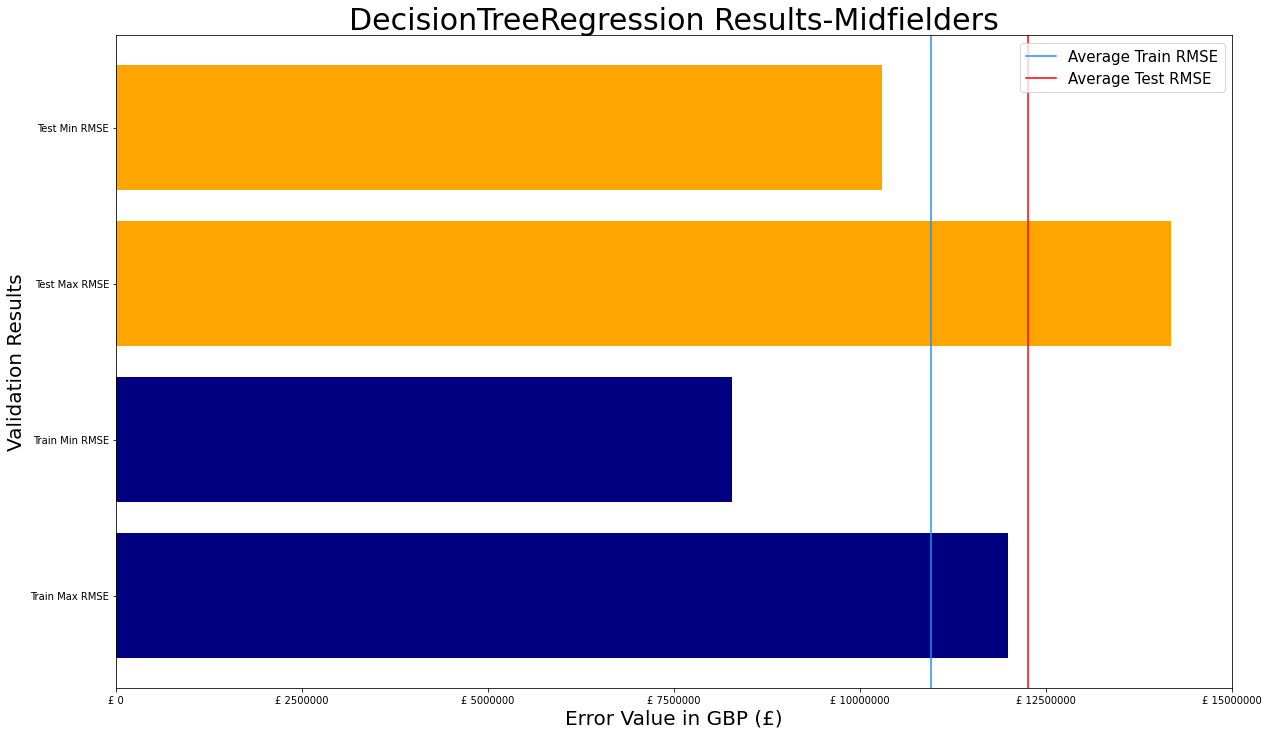

In [29]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([int(results_mid.iloc[0][2]),(round(results_mid.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_mid.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_mid.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_mid.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_mid.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_mid.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_mid.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('DecisionTreeRegression Results-Midfielders',fontsize=30)
ax.legend(fontsize=15)

# Applying the above workflow for Defenders

In [30]:
X = defence.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)
y = defence['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first DecisionTree to get important features

#Initiating DecisionTreeRegressor
DtReg = DecisionTreeRegressor()

DtReg.fit(X_train_scaled,y_train)

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(DtReg.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.
X = defence.drop(['Tournament','Player','Club','Number','Date','Nation','Pos','Position','Age','Market_value'],axis=1)[top_features]
y = defence['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(DtReg,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=3)

tuning_model.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((tuning_model.best_params_).values())

############################################################################
        
# Traning model with all features using better Decision Tree Hyperparameters

#Initiating a new DecisionTreeRegressor
DtReg_Grid = DecisionTreeRegressor(max_depth=param_values[0],
                                 max_features=param_values[1],
                                 max_leaf_nodes=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_weight_fraction_leaf=param_values[4],
                                 splitter=param_values[5])

DtReg_Grid.fit(X_train_scaled,y_train);

cross_val_train = cross_val_score(DtReg_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(DtReg_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-10407565.636 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-7880067.451 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-9631010.853 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-10188913.590 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-9994290.576 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fracti

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf mus

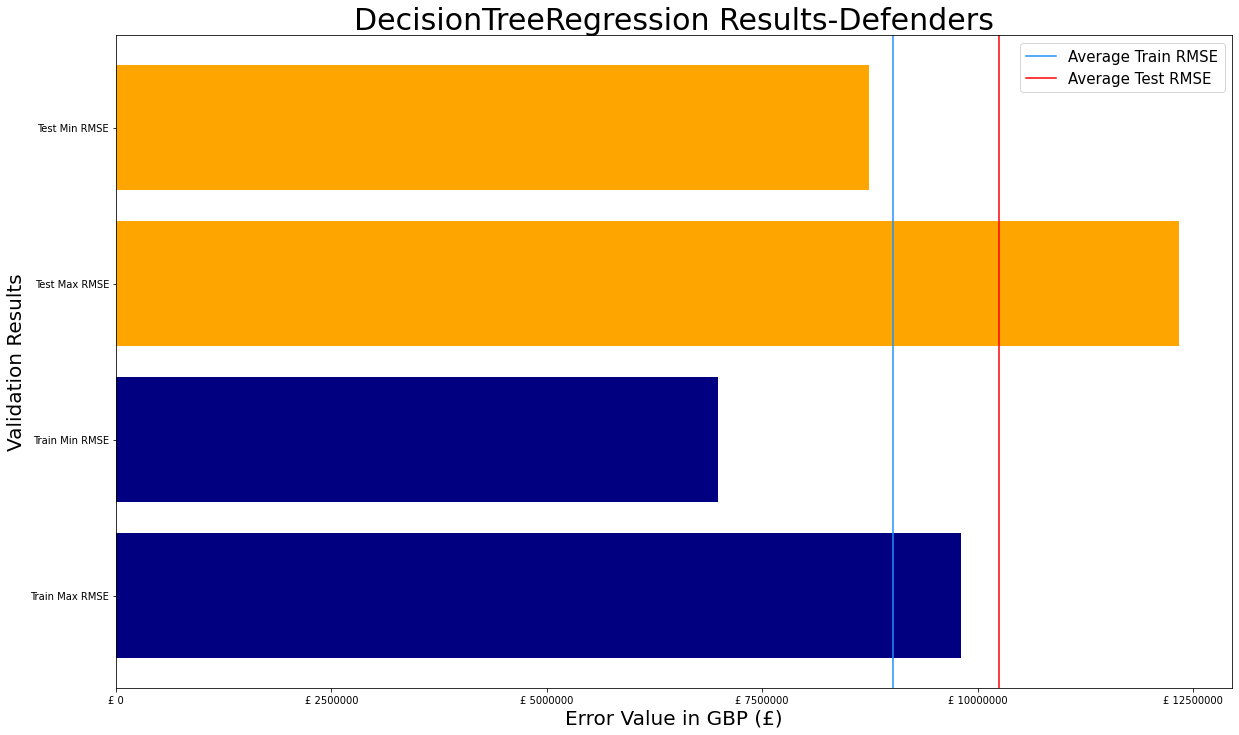

In [31]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results_def.iloc[0][2],(round(results_def.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_def.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_def.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_def.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_def.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_def.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_def.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('DecisionTreeRegression Results-Defenders',fontsize=30)
ax.legend(fontsize=15)

In [32]:
X = gk.drop(['Tournament','Player','Nation','Age','Market_value'],axis=1)
y = gk['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#Fitting data into first DecisionTree to get important features

#Initiating DecisionTreeRegressor
DtReg = DecisionTreeRegressor()

DtReg.fit(X_train_scaled,y_train)

############################################################################

#Extracting Most Important Features

feat_importances = pd.Series(DtReg.feature_importances_, index=X_train.columns)

#Creating a list of top features
top_features = list(feat_importances.nlargest(10).keys())

############################################################################

#Repeating Workflow. This time only with most important features.

#This is because of computational constraints from GridSearching over 500 features.
X = gk.drop(['Tournament','Player','Nation','Age','Market_value'],axis=1)[top_features]
y = gk['Market_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)


############################################################################

#Pre-processing

#Making the distribution of the features more Gaussian
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Scaling the data

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

############################################################################

#GridSearching improved hyperparameters

# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(DtReg,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=3)

tuning_model.fit(X_train_scaled,y_train)


#Extracting the best Parameters
param_values = list((tuning_model.best_params_).values())

############################################################################
        
# Traning model with all features using better Decision Tree Hyperparameters

#Initiating a new DecisionTreeRegressor
DtReg_Grid = DecisionTreeRegressor(max_depth=param_values[0],
                                 max_features=param_values[1],
                                 max_leaf_nodes=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 min_weight_fraction_leaf=param_values[4],
                                 splitter=param_values[5])

DtReg_Grid.fit(X_train_scaled,y_train);

cross_val_train = cross_val_score(DtReg_Grid, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(DtReg_Grid, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results_gk = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_gk.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_gk.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

Streaming output truncated to the last 5000 lines.
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-10238298.600 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-6316802.064 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-7907745.990 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-11936243.919 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fraction_leaf=0.5, splitter=best;, score=-11089028.994 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, max_leaf_nodes=40, min_samples_leaf=5, min_weight_fract

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf mus

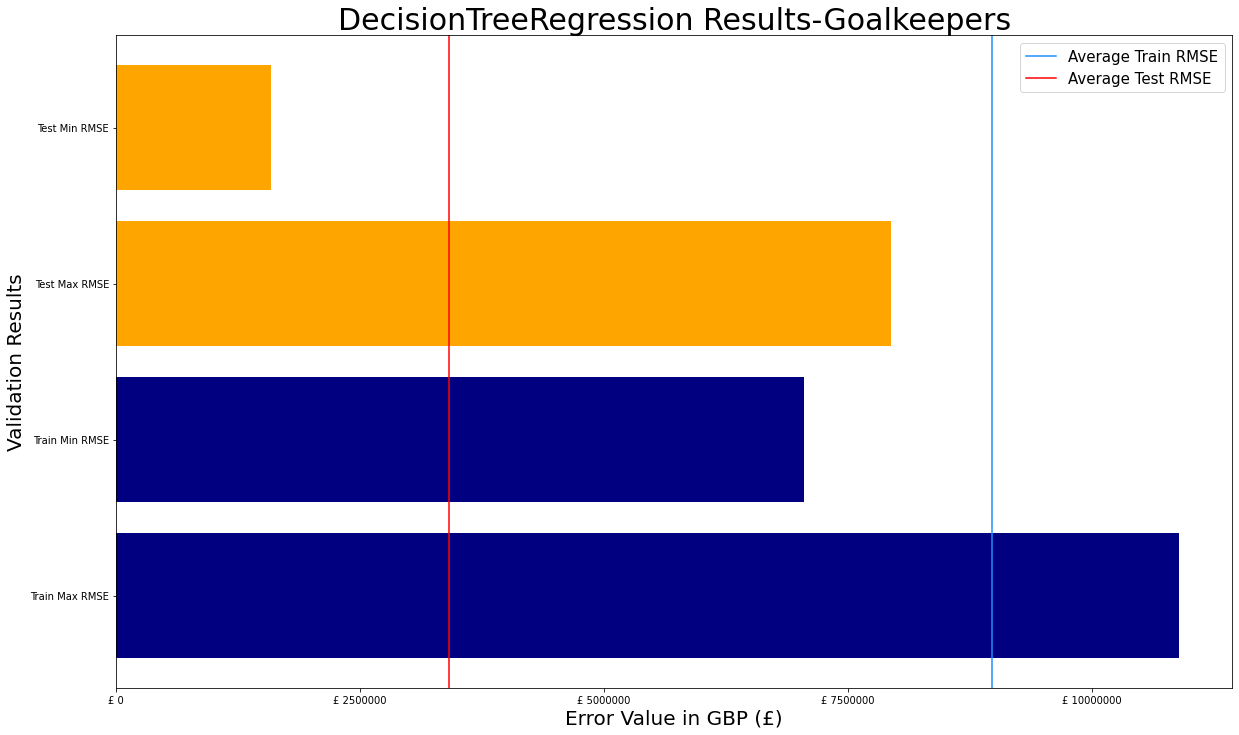

In [35]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([int(results_gk.iloc[0][2]),(round(results_gk.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results_gk.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results_gk.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results_gk.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results_gk.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results_gk.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results_gk.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('DecisionTreeRegression Results-Goalkeepers',fontsize=30)
ax.legend(fontsize=15)

# Comparing Model Performance for all three Positions

### Attackers

In [36]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,15010198.89,19708755.64,11923836.02
1,Test,14957001.29,18042967.22,5944310.66


### Midfielders

In [37]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,10957346.11,11992365.25,8276765.86
1,Test,12262623.65,14183001.54,10299685.01


### Defenders

In [38]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9019812.40,9803985.14,6989952.47
1,Test,10252529.95,12338354.81,8734656.99


In [40]:
results_gk

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,8976030.93,10894246.49,7047112.95
1,Test,3412247.68,7940510.70,1591636.84


## Visualizing RMSEs together

Text(0.5, 1.0, 'Decision Tree Average Results')

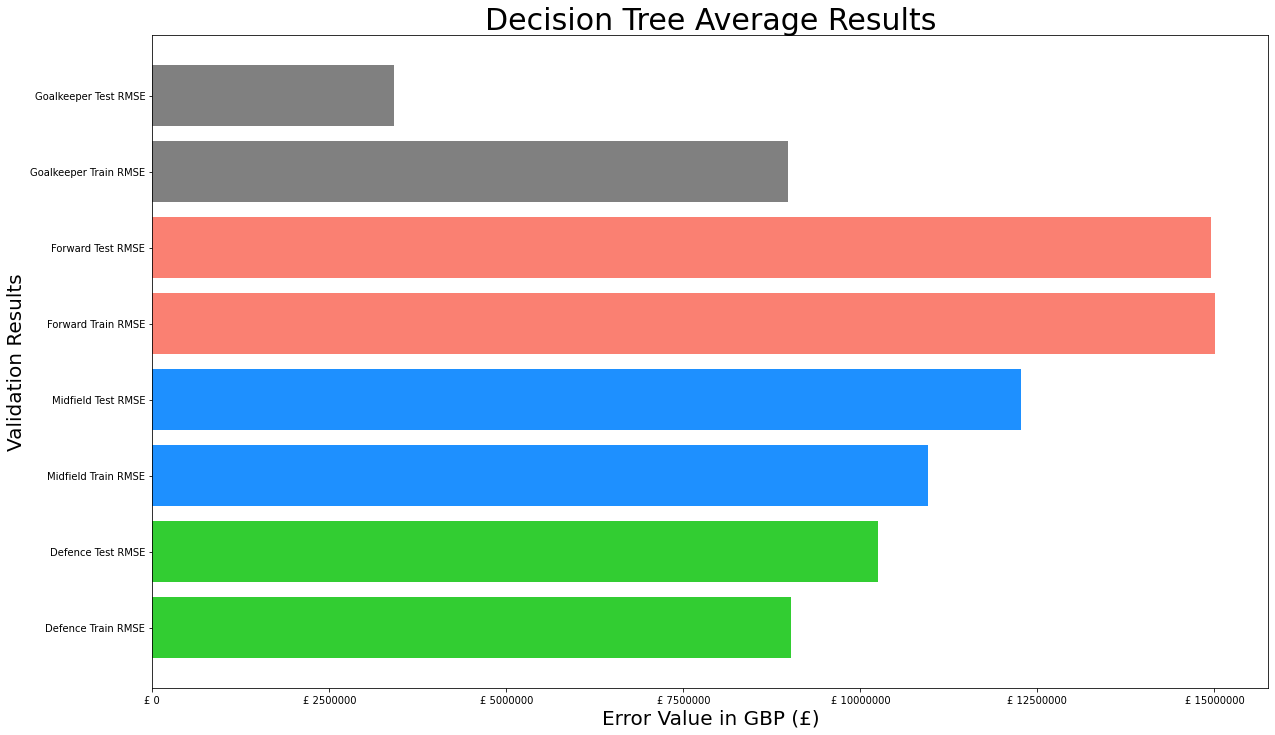

In [41]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max([max(results_att['Avg RMSE']),max(results_mid['Avg RMSE']),max(results_def['Avg RMSE'])])+1000000),2500000))
y_ticks = [1,2,3,4,5,6,7,8]
y_ticks = [1,2,3,4,5,6,7,8]
y_labels = ['Defence Train RMSE','Defence Test RMSE',
            'Midfield Train RMSE','Midfield Test RMSE',
            'Forward Train RMSE','Forward Test RMSE',
            'Goalkeeper Train RMSE','Goalkeeper Test RMSE']

#Defence Results
def_train_pos = 1
def_train = results_def.iloc[0][1]
ax.barh(def_train_pos,def_train,color='limegreen')

def_test_pos = 2
def_test = results_def.iloc[1][1]
ax.barh(def_test_pos,def_test,color='limegreen')

#Midfield Results
mid_train_pos = 3
mid_train = results_mid.iloc[0][1]
ax.barh(mid_train_pos,mid_train,color='dodgerblue')

mid_test_pos = 4
mid_test = results_mid.iloc[1][1]
ax.barh(mid_test_pos,mid_test,color='dodgerblue')

#Attack Results
att_train_pos = 5
att_train = results_att.iloc[0][1]
ax.barh(att_train_pos,att_train,color='salmon')

att_test_pos = 6
att_test = results_att.iloc[1][1]
ax.barh(att_test_pos,att_test,color='salmon')

#Goalkeeper Results
att_train_pos = 7
att_train = results_gk.iloc[0][1]
ax.barh(att_train_pos,att_train,color='grey')

att_test_pos = 8
att_test = results_gk.iloc[1][1]
ax.barh(att_test_pos,att_test,color='grey')


#Labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Decision Tree Average Results',fontsize=30)